<a href="https://colab.research.google.com/github/Hanna-Cupery/python_course_materials/blob/master/Parsing_IMDB_Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
import seaborn
from lxml import html
import matplotlib
import numpy
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
from collections import Counter
import matplotlib.pyplot as plt
 

Получаем 250 самых топовых фильмов

In [2]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

Парсим страницу с фильмами и получаем грязные данные с


1.   Названием фильма
2.   Рейтингом
3.   Командой 
4.   Ссылкой на основную страницу




In [3]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]


In [4]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data

,movies,ratings,crew,links
0,"[\n 1.\n , [The Shawshank Redemption...",9.239990361473694,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.160997117810007,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.993872535873475,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [The Godfather: Part II],...",8.99010819442431,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.950785755799387,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [Beauty and the Beast],...",8.01663851953185,"Gary Trousdale (dir.), Paige O'Hara, Robby Benson",/title/tt0101414/
246,"[\n 247.\n , [Gandhi], \n, [(1982)],...",8.015339636591271,"Richard Attenborough (dir.), Ben Kingsley, Joh...",/title/tt0083987/
247,"[\n 248.\n , [The Help], \n, [(2011)...",8.014439636681775,"Tate Taylor (dir.), Emma Stone, Viola Davis",/title/tt1454029/
248,"[\n 249.\n , [The Handmaiden], \n, [...",8.012729574223776,"Park Chan-wook (dir.), Kim Min-hee, Ha Jung-woo",/title/tt4016934/


Несколько функциий для преобзразования грязных заголовков с названием фильмов


In [5]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()

In [6]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

In [7]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)

In [8]:
data.head()

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [The Shawshank Redemption...",9.239990361473694,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.160997117810007,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.993872535873475,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008
3,"[\n 4.\n , [The Godfather: Part II],...",8.99010819442431,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather: Part II,1974
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.950785755799387,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957


In [9]:
data.crew[1]

'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'

In [10]:
import re 
text = 'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'
def delete_dir(text):
  a = re.search('\(dir.\)', text)
  new_text = text[0:a.span()[0]-1] +text[a.span()[1]:len(text)]
  return new_text
print(delete_dir(text))


Francis Ford Coppola, Marlon Brando, Al Pacino


In [11]:
data["crew_without_dir"] = data.crew.apply(delete_dir)
data.head()

,movies,ratings,crew,links,title,year,crew_without_dir
0,"[\n 1.\n , [The Shawshank Redemption...",9.239990361473694,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,"Frank Darabont, Tim Robbins, Morgan Freeman"
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.160997117810007,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,"Francis Ford Coppola, Marlon Brando, Al Pacino"
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.993872535873475,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,"Christopher Nolan, Christian Bale, Heath Ledger"
3,"[\n 4.\n , [The Godfather: Part II],...",8.99010819442431,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather: Part II,1974,"Francis Ford Coppola, Al Pacino, Robert De Niro"
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.950785755799387,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,"Sidney Lumet, Henry Fonda, Lee J. Cobb"


In [12]:

crew_members = [member for members in data["crew_without_dir"].tolist() for member in members.split(",")]
print('Number of unique names (задача 1): ')
print(len(Counter(crew_members))) 



Number of unique names (задача 1): 
536


In [13]:
text = 'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'
def find_director(text):
  a = re.search('\(dir.\)', text)
  new_text = text[0:a.span()[0]-1]
  return new_text
print(find_director(text))

data["directors"] = data.crew.apply(find_director)
data.head()

Francis Ford Coppola


,movies,ratings,crew,links,title,year,crew_without_dir,directors
0,"[\n 1.\n , [The Shawshank Redemption...",9.239990361473694,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,"Frank Darabont, Tim Robbins, Morgan Freeman",Frank Darabont
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.160997117810007,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,"Francis Ford Coppola, Marlon Brando, Al Pacino",Francis Ford Coppola
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.993872535873475,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,"Christopher Nolan, Christian Bale, Heath Ledger",Christopher Nolan
3,"[\n 4.\n , [The Godfather: Part II],...",8.99010819442431,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather: Part II,1974,"Francis Ford Coppola, Al Pacino, Robert De Niro",Francis Ford Coppola
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.950785755799387,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,"Sidney Lumet, Henry Fonda, Lee J. Cobb",Sidney Lumet


In [14]:
directors =data["directors"].tolist()
occurence_count = Counter(directors)
print('Directors with highest number of top-rated films (задача 2): ')
occurence_count.most_common(6)


Directors with highest number of top-rated films (задача 2): 


[('Christopher Nolan', 7),
 ('Steven Spielberg', 7),
 ('Martin Scorsese', 7),
 ('Akira Kurosawa', 7),
 ('Stanley Kubrick', 7),
 ('Alfred Hitchcock', 6)]

(array([110.,  23.,   0.,  10.,   0.,   2.,   3.,   0.,   1.,   5.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

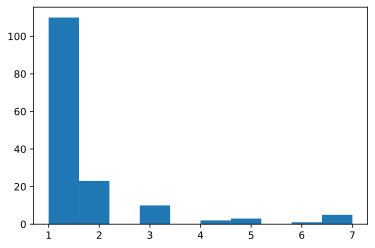

In [15]:
plt.hist(occurence_count.values())
#Задача 2 визуализация 

In [16]:
occurence_count_crew_members = Counter(crew_members)
print('crew_members with highest number of top-rated films (задача 3): ')
occurence_count_crew_members.most_common(2)

crew_members with highest number of top-rated films (задача 3): 


[(' Robert De Niro', 9), ('Christopher Nolan', 7)]

Distribution by years (задача 4): 


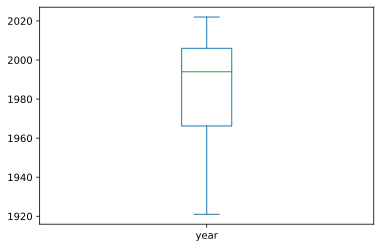

In [17]:
print('Distribution by years (задача 4): ')
data['year']=data['year'].astype(float)

data['year'].plot(kind="box");


In [18]:
ratings = data['ratings'].tolist()
ratings = [float(x) for x in ratings ]
print(ratings)
ratings_to_hundreths =[round(x, ndigits=2) for x in ratings]
ratings_to_tenths =[round(x, ndigits=1) for x in ratings]
ratings_to_whole_numbers =[round(x) for x in ratings]

[9.239990361473694, 9.160997117810007, 8.993872535873475, 8.99010819442431, 8.950785755799387, 8.940049003279455, 8.927414119189285, 8.858810861968864, 8.811531734520523, 8.802295468687554, 8.776367660913861, 8.759865935662638, 8.743842936909347, 8.735630084749532, 8.709747997929076, 8.680519359873934, 8.65880598449532, 8.649427823240158, 8.611880437122217, 8.604253834763961, 8.603868515878773, 8.596271422639827, 8.585612485087887, 8.58496381781155, 8.572124633341032, 8.568043188916544, 8.56446954375313, 8.563257915621827, 8.544480676457402, 8.527180890896993, 8.523349473042304, 8.515583760115458, 8.512253701334082, 8.5118836961639, 8.50218212541421, 8.498649311794912, 8.49467787382301, 8.493850587743115, 8.486044984298172, 8.48413377631363, 8.478042206161085, 8.471957966147956, 8.465488386693231, 8.462553453937522, 8.456649463390615, 8.455256274241048, 8.452989025434672, 8.452425337929522, 8.44355845468926, 8.443083050149683, 8.441000167748967, 8.43527635895538, 8.432049269458549, 8.4

(array([ 3., 10.,  0., 12.,  6.,  0.,  7.,  0.,  6., 12.,  0., 11.,  0.,
        10.,  3.,  0.,  1.,  8.,  0.,  3.,  0.,  8.,  6.,  0.,  5.,  0.,
         5.,  2.,  0.,  2.,  2.,  0.,  3.,  0.,  6., 11.,  0.,  5.,  0.,
         5.,  6.,  0.,  4.,  4.,  0.,  3.,  0.,  0.,  3.,  0.,  5.,  0.,
         3.,  3.,  0.,  2.,  2.,  0.,  2.,  0.,  2.,  2.,  0.,  1.,  0.,
         1.,  1.,  0.,  2.,  4.,  0.,  2.,  0.,  3.,  2.,  0.,  2.,  0.,
         3.,  2.,  0.,  2.,  2.,  0.,  1.,  0.,  1.,  0.,  0.,  2.,  0.,
         2.,  1.,  0.,  1.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

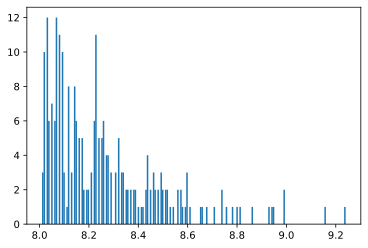

In [19]:
plt.hist(ratings_to_hundreths, bins=200)

(array([35., 67.,  0., 47.,  0., 35., 18.,  0., 20.,  0., 11.,  5.,  0.,
         4.,  0.,  3.,  3.,  0.,  0.,  2.]),
 array([8.  , 8.06, 8.12, 8.18, 8.24, 8.3 , 8.36, 8.42, 8.48, 8.54, 8.6 ,
        8.66, 8.72, 8.78, 8.84, 8.9 , 8.96, 9.02, 9.08, 9.14, 9.2 ]),
 <a list of 20 Patch objects>)

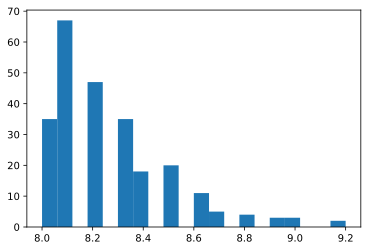

In [20]:
plt.hist(ratings_to_tenths, bins = 20)

(array([215.,  35.]), array([8. , 8.5, 9. ]), <a list of 2 Patch objects>)

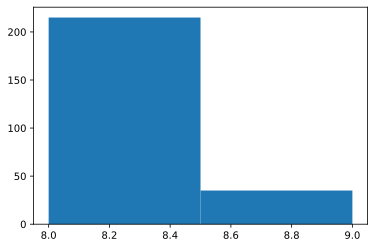

In [21]:
plt.hist(ratings_to_whole_numbers, bins =2)

Задача 1.
Получить список всех участников команд (убрать постфикс `(dir.)` у директоров). Найти количество уникальных имен. 

Задача 2.
Получить список всех директоров. Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.

Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе.

Задача 4. Построить распределение топовых фильмов по годам

Задача 5. Построить распределение топовых фильмов рейтингу:


*   Округлить до сотых и отрисовать
*   Округлить до десятых и отрисовать
*   Округлить до целых и отрисовать

Задача 6. Используйте ссылку `http://www.imdb.com/` и динамически добавляя ссылку на фильм из колонки `links` соберите описание фильмов. Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.










In [22]:
def find_description(link):
  link = 'http://www.imdb.com'+link
  html_text = requests.get(link).text
  soup = BeautifulSoup(html_text, 'lxml')
  return soup.find_all(attrs={"name": "description"})[0].get("content")

print(find_description('/title/tt0068646/'))
data["description"] = data.links.apply(find_description)
data.head()


The Godfather: Directed by Francis Ford Coppola. With Marlon Brando, Al Pacino, James Caan, Richard S. Castellano. The aging patriarch of an organized crime dynasty in postwar New York City transfers control of his clandestine empire to his reluctant youngest son.


,movies,ratings,crew,links,title,year,crew_without_dir,directors,description
0,"[\n 1.\n , [The Shawshank Redemption...",9.239990361473694,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994.0,"Frank Darabont, Tim Robbins, Morgan Freeman",Frank Darabont,The Shawshank Redemption: Directed by Frank Da...
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.160997117810007,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972.0,"Francis Ford Coppola, Marlon Brando, Al Pacino",Francis Ford Coppola,The Godfather: Directed by Francis Ford Coppol...
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.993872535873475,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008.0,"Christopher Nolan, Christian Bale, Heath Ledger",Christopher Nolan,The Dark Knight: Directed by Christopher Nolan...
3,"[\n 4.\n , [The Godfather: Part II],...",8.99010819442431,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather: Part II,1974.0,"Francis Ford Coppola, Al Pacino, Robert De Niro",Francis Ford Coppola,The Godfather: Part II: Directed by Francis Fo...
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.950785755799387,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957.0,"Sidney Lumet, Henry Fonda, Lee J. Cobb",Sidney Lumet,12 Angry Men: Directed by Sidney Lumet. With M...


In [ ]:
 film_url = 'http://www.imdb.com/title/tt0068646/'
 html_text = requests.get(film_url).text

In [ ]:
soup = BeautifulSoup(html_text, 'lxml')
soup.find_all(attrs={"name": "description"})[0].get("content")

'The Godfather: Directed by Francis Ford Coppola. With Marlon Brando, Al Pacino, James Caan, Richard S. Castellano. The aging patriarch of an organized crime dynasty in postwar New York City transfers control of his clandestine empire to his reluctant youngest son.'

In [82]:
data['actors_from_description'] = data['description'].apply(find_actors)
def find_actors(text):
  try: 
    actors = re.findall('With (.+?[a-z])\.',  text) #must have a lower-case letter before the period, as intials can also be followed by dots 
    return actors[0].split(',')
  except: 
    return 'NA'
print(find_actors('he Shawshank Redemption: Directed by Frank Darabont. With im Robbins, Morgan Freeman, Bob Gunton, Gunton W. Sadler. Two. lj  '))


['im Robbins', ' Morgan Freeman', ' Bob Gunton', ' Gunton W. Sadler']


In [83]:
list_actors = data['actors_from_description'].tolist()
NA_count = 0
for x in list_actors:
  if x == 'NA':
    NA_count += 1
print('Number of films for which the actors could be found (Задача 7): ')
print(250- NA_count)


Number of films for which the actors could be found (Задача 7): 
250



Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: перечисление актеров иногда начинается с with. 


Задача 8. Распарсите исходную страницу с топ-250 фильмов и получите для каждого фильмов количество оценок. Пример текста в исходной странице:`9.2 based on 2,554,919 user ratings`. Из этого текста нужно достать = `2,554,919`. Подсказка: используя метод `find_all` с аргументом `attrs` в который нужно передать `{'class': 'ratingColumn imdbRating'}` от страници `http://www.imdb.com/chart/top`. Найдите 10 фильмов (вывести их название и кол-во оценок) у которых, самое большое количество оценок.


Задача 9. Постройте топ 10 слов, которые встречаются 

1.   в названии фильмов
2.   в описании фильмов
3.   в названии и в описании фильмов


Задача 10*. Спарсить теги фильмов со страницы каждого фильма, так например для `The Godfather` ожидается получить список из `Crime, Drama`. (Можно увидеть эти теги по картинкой к фильму)


In [95]:
titles = data['title'].tolist()
words_in_title =[]
for title in titles:
  words = title.split(' ')
  for word in words:
    words_in_title.append(word.lower())
frequent_words = Counter(words_in_title)
print('Most common word in titles(задача 9.1): ')
frequent_words.most_common(10)

Most common word in titles(задача 9.1): 


[('the', 96),
 ('of', 30),
 ('and', 12),
 ('a', 12),
 ('to', 7),
 ('for', 6),
 ('in', 5),
 ('lord', 3),
 ('rings:', 3),
 ('star', 3)]

In [97]:
descriptions = data['description'].tolist()
words_in_descriptions =[]
for description in descriptions:
  words = description.split(' ')
  for word in words:
    words_in_descriptions.append(word.lower().strip())
frequent_words_description = Counter(words_in_descriptions)
print('Most common word in description (задача 9.2): ')
frequent_words_description.most_common(10)

Most common word in description (задача 9.2): 


[('the', 456),
 ('a', 396),
 ('with', 315),
 ('by', 297),
 ('directed', 250),
 ('to', 236),
 ('of', 233),
 ('and', 190),
 ('in', 157),
 ('his', 146)]

In [103]:
all_words = words_in_title + words_in_descriptions
frequent_words_all = Counter(all_words)
print('Most common word in description and title (задача 9.3): ')
frequent_words_all.most_common(10)

Most common word in description and title (задача 9.3): 


[('the', 552),
 ('a', 408),
 ('with', 317),
 ('by', 299),
 ('of', 263),
 ('directed', 250),
 ('to', 243),
 ('and', 202),
 ('in', 162),
 ('his', 146)]